In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import os
for dirname,_,filenames in os.walk('./data'):
    
    for filename in filenames:
        print(os.path.join(dirname,filename))

./data\personality_dataset.csv
./data\sample_submission.csv
./data\test.csv
./data\train.csv


In [4]:
df=pd.read_csv('./data/train.csv')
df_test=pd.read_csv('./data/test.csv')
df_sample_submission=pd.read_csv('./data/sample_submission.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [6]:
df.shape

(18524, 9)

In [7]:
df.columns.tolist()

['id',
 'Time_spent_Alone',
 'Stage_fear',
 'Social_event_attendance',
 'Going_outside',
 'Drained_after_socializing',
 'Friends_circle_size',
 'Post_frequency',
 'Personality']

In [8]:
df['Personality'].value_counts()

Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64

In [9]:
df.head(5)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [10]:
df['Stage_fear'].unique()
print(df['Drained_after_socializing'].unique())

['No' nan 'Yes']


In [11]:
mapping = {'Yes': 1, 'No': 0}
df['Stage_fear'] = df['Stage_fear'].map(mapping)

mapping1 = {'Yes': 1, 'No': 0}
df['Drained_after_socializing'] = df['Drained_after_socializing'].map(mapping1)

mapping2 = {'Extrovert': 1, 'Introvert': 0}
df['Personality'] = df['Personality'].map(mapping2)

In [12]:
df.head(5)

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0.0,6.0,4.0,0.0,15.0,5.0,1
1,1,1.0,0.0,7.0,3.0,0.0,10.0,8.0,1
2,2,6.0,1.0,1.0,0.0,NaN,3.0,0.0,0
3,3,3.0,0.0,7.0,3.0,0.0,11.0,5.0,1
4,4,1.0,0.0,4.0,4.0,0.0,13.0,NaN,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  float64
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  float64
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.3 MB


In [14]:
df.select_dtypes(include=['int64','float64']).columns.tolist()

['id',
 'Time_spent_Alone',
 'Stage_fear',
 'Social_event_attendance',
 'Going_outside',
 'Drained_after_socializing',
 'Friends_circle_size',
 'Post_frequency',
 'Personality']

In [15]:
df.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [16]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
num_cols = [
 'Time_spent_Alone',
 'Stage_fear',
 'Social_event_attendance',
 'Going_outside',
 'Drained_after_socializing',
 'Friends_circle_size',
 'Post_frequency',
 ]

imputer = KNNImputer(n_neighbors=5)
df[num_cols] = imputer.fit_transform(df[num_cols])
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [17]:
df.isnull().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

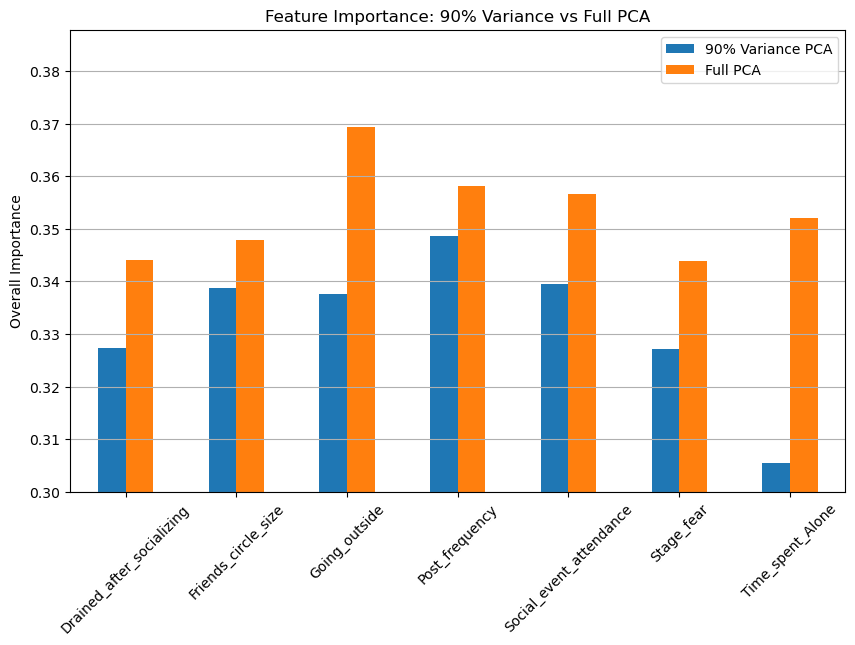

In [40]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

num_cols = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
            'Going_outside', 'Drained_after_socializing',
            'Friends_circle_size', 'Post_frequency']

X = df[num_cols]

pca_90 = PCA(n_components=0.90)
X_pca_90 = pca_90.fit_transform(X)

loadings_90 = pd.DataFrame(pca_90.components_.T,
                           columns=[f'PC{i+1}' for i in range(pca_90.n_components_)],
                           index=num_cols)

explained_var_90 = pca_90.explained_variance_ratio_

feature_importance_90 = (abs(loadings_90) * explained_var_90).sum(axis=1)

pca_full = PCA()
X_pca_full = pca_full.fit_transform(X)

loadings_full = pd.DataFrame(pca_full.components_.T,
                             columns=[f'PC{i+1}' for i in range(pca_full.n_components_)],
                             index=num_cols)

explained_var_full = pca_full.explained_variance_ratio_

feature_importance_full = (abs(loadings_full) * explained_var_full).sum(axis=1)

df_plot = pd.DataFrame({
    '90% Variance PCA': feature_importance_90,
    'Full PCA': feature_importance_full
}).sort_index()

df_plot.plot(kind='bar', figsize=(10,6))
plt.title('Feature Importance: 90% Variance vs Full PCA')
plt.ylabel('Overall Importance')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.ylim(0.30, None)
plt.show()

In [54]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import f1_score,classification_report,confusion_matrix,accuracy_score
num_cols = [
    'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
    'Going_outside', 'Drained_after_socializing',
    'Friends_circle_size', 'Post_frequency'
]

X = df[num_cols]
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
def objective(trial):
    C = trial.suggest_loguniform('C',1e-3,1e2)
    solver = trial.suggest_categorical('solver',['liblinear','lbfgs'])
    penalty = 'l2'
    class_weight = trial.suggest_categorical('class_weight',[None,'balanced'])
    model = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=2000,
        random_state=42,
        class_weight=class_weight
    )
    scores = cross_val_score(model,X_train,y_train,cv=5,scoring='f1_macro')
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective,n_trials=50,show_progress_bar=True)
print('best hyperparameters:...')
print(study.best_params)
best_params = study.best_params
best_model = LogisticRegression(
    C=best_params['C'],
    solver = best_params['solver'],
    penalty = 'l2',
    class_weight = best_params['class_weight'],
    max_iter = 2000,
    random_state = 42,
)

best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
print("\nModel Performance on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[I 2025-11-04 22:25:22,940] A new study created in memory with name: no-name-204a434a-c315-4c2e-a761-1fb07f91b929


  0%|          | 0/50 [00:00<?, ?it/s]

C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:23,113] Trial 0 finished with value: 0.9609178661946223 and parameters: {'C': 0.010042709007447189, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9609178661946223.
[I 2025-11-04 22:25:23,278] Trial 1 finished with value: 0.960841339112511 and parameters: {'C': 0.005506294703799896, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9609178661946223.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:23,436] Trial 2 finished with value: 0.9608202534232723 and parameters: {'C': 0.019295195710102093, 'solver': 'lbfgs', 'class_weight': None}. Best is trial 0 with value: 0.9609178661946223.
[I 2025-11-04 22:25:23,580] Trial 3 finished with value: 0.9605732756056493 and parameters: {'C': 11.476726760304294, 'solver': 'liblinear', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9609178661946223.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:23,714] Trial 4 finished with value: 0.9608202534232723 and parameters: {'C': 0.013136369209954939, 'solver': 'lbfgs', 'class_weight': None}. Best is trial 0 with value: 0.9609178661946223.
[I 2025-11-04 22:25:23,821] Trial 5 finished with value: 0.9608263946451261 and parameters: {'C': 0.007803413397847901, 'solver': 'liblinear', 'class_weight': None}. Best is trial 0 with value: 0.9609178661946223.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:23,957] Trial 6 finished with value: 0.9604497422334262 and parameters: {'C': 26.69382676856687, 'solver': 'liblinear', 'class_weight': None}. Best is trial 0 with value: 0.9609178661946223.
[I 2025-11-04 22:25:24,102] Trial 7 finished with value: 0.9608263946451261 and parameters: {'C': 0.011168985915998134, 'solver': 'liblinear', 'class_weight': None}. Best is trial 0 with value: 0.9609178661946223.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:24,286] Trial 8 finished with value: 0.9605732756056493 and parameters: {'C': 5.691777476793533, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9609178661946223.
[I 2025-11-04 22:25:24,384] Trial 9 finished with value: 0.9608263946451261 and parameters: {'C': 0.006127610081469516, 'solver': 'liblinear', 'class_weight': None}. Best is trial 0 with value: 0.9609178661946223.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:24,535] Trial 10 finished with value: 0.9605732756056493 and parameters: {'C': 0.25746355216115274, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9609178661946223.
[I 2025-11-04 22:25:24,679] Trial 11 finished with value: 0.9609386844713794 and parameters: {'C': 0.001174769084625984, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:24,800] Trial 12 finished with value: 0.9609386844713794 and parameters: {'C': 0.0011887146142467516, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:24,946] Trial 13 finished with value: 0.9609386844713794 and parameters: {'C': 0.0010362119144234838, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:25,105] Trial 14 finished with value: 0.9605732756056493 and parameters: {'C': 0.4480783185987868, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:25,255] Trial 15 finished with value: 0.9609386844713794 and parameters: {'C': 0.0010056836292784584, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:25,417] Trial 16 finished with value: 0.9605732756056493 and parameters: {'C': 0.14126559290821275, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:25,593] Trial 17 finished with value: 0.9605732756056493 and parameters: {'C': 0.05885321133534372, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:25,719] Trial 18 finished with value: 0.9608474613434016 and parameters: {'C': 0.0025115135416833886, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:25,885] Trial 19 finished with value: 0.9605732756056493 and parameters: {'C': 1.5630607226240028, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:26,037] Trial 20 finished with value: 0.9605732756056493 and parameters: {'C': 0.055094126310325335, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:26,172] Trial 21 finished with value: 0.9609386844713794 and parameters: {'C': 0.0010249333336127748, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:26,297] Trial 22 finished with value: 0.9608474613434016 and parameters: {'C': 0.0022808975032718127, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:26,409] Trial 23 finished with value: 0.9608474613434016 and parameters: {'C': 0.0023781273502266253, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:26,579] Trial 24 finished with value: 0.9605732756056493 and parameters: {'C': 92.55340112055475, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:26,714] Trial 25 finished with value: 0.9607420256094021 and parameters: {'C': 0.03794080335240808, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:26,816] Trial 26 finished with value: 0.9608539961877358 and parameters: {'C': 0.002988428935434602, 'solver': 'liblinear', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:26,944] Trial 27 finished with value: 0.9609386844713794 and parameters: {'C': 0.0010199395460458234, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:27,095] Trial 28 finished with value: 0.9607420256094021 and parameters: {'C': 0.02924507763357047, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:27,248] Trial 29 finished with value: 0.9609326415345096 and parameters: {'C': 0.0042597405518807014, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:27,410] Trial 30 finished with value: 0.9605732756056493 and parameters: {'C': 0.9951829694392429, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:27,523] Trial 31 finished with value: 0.9609386844713794 and parameters: {'C': 0.0013222101604173223, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:27,639] Trial 32 finished with value: 0.9609386844713794 and parameters: {'C': 0.0015567119820965591, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:27,777] Trial 33 finished with value: 0.9609326415345096 and parameters: {'C': 0.004441433530065051, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:27,935] Trial 34 finished with value: 0.9608263946451261 and parameters: {'C': 0.01606851057596161, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:28,072] Trial 35 finished with value: 0.960841339112511 and parameters: {'C': 0.006374387509980194, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:28,192] Trial 36 finished with value: 0.9609063191150318 and parameters: {'C': 0.0017801606151193726, 'solver': 'lbfgs', 'class_weight': None}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:28,287] Trial 37 finished with value: 0.9607627730597578 and parameters: {'C': 0.0039365591543339485, 'solver': 'liblinear', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:28,404] Trial 38 finished with value: 0.9607304099785633 and parameters: {'C': 0.009047349704222976, 'solver': 'lbfgs', 'class_weight': None}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:28,498] Trial 39 finished with value: 0.9607420256094021 and parameters: {'C': 0.019707639509949706, 'solver': 'liblinear', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:28,612] Trial 40 finished with value: 0.9609063191150318 and parameters: {'C': 0.00168228953344819, 'solver': 'lbfgs', 'class_weight': None}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:28,736] Trial 41 finished with value: 0.9609386844713794 and parameters: {'C': 0.0010317904084491637, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:28,849] Trial 42 finished with value: 0.9609386844713794 and parameters: {'C': 0.0011605717604753097, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:28,975] Trial 43 finished with value: 0.9609326415345096 and parameters: {'C': 0.0032872060264135293, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.
[I 2025-11-04 22:25:29,117] Trial 44 finished with value: 0.960841339112511 and parameters: {'C': 0.006433255834236086, 'solver': 'lbfgs', 'class_weight': 'balanced'}. Best is trial 11 with value: 0.9609386844713794.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:29,216] Trial 45 finished with value: 0.9609455174679076 and parameters: {'C': 0.002012538910195822, 'solver': 'liblinear', 'class_weight': 'balanced'}. Best is trial 45 with value: 0.9609455174679076.
[I 2025-11-04 22:25:29,330] Trial 46 finished with value: 0.9608263946451261 and parameters: {'C': 0.012247556262777097, 'solver': 'liblinear', 'class_weight': None}. Best is trial 45 with value: 0.9609455174679076.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)
C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:29,447] Trial 47 finished with value: 0.9608539961877358 and parameters: {'C': 0.0021768016018791224, 'solver': 'liblinear', 'class_weight': 'balanced'}. Best is trial 45 with value: 0.9609455174679076.
[I 2025-11-04 22:25:29,564] Trial 48 finished with value: 0.9607627730597578 and parameters: {'C': 0.003604751126762146, 'solver': 'liblinear', 'class_weight': 'balanced'}. Best is trial 45 with value: 0.9609455174679076.


C:\Users\msk01\AppData\Local\Temp\ipykernel_27580\2658172278.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C',1e-3,1e2)


[I 2025-11-04 22:25:29,686] Trial 49 finished with value: 0.9609178661946223 and parameters: {'C': 0.010028037790938202, 'solver': 'liblinear', 'class_weight': 'balanced'}. Best is trial 45 with value: 0.9609455174679076.
best hyperparameters:...
{'C': 0.002012538910195822, 'solver': 'liblinear', 'class_weight': 'balanced'}

Model Performance on Test Set:
Accuracy: 0.9649122807017544
F1 Score: 0.954212924304025
Confusion Matrix:
 [[ 892   73]
 [  57 2683]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       965
           1       0.97      0.98      0.98      2740

    accuracy                           0.96      3705
   macro avg       0.96      0.95      0.95      3705
weighted avg       0.96      0.96      0.96      3705



In [55]:
from sklearn.metrics import roc_auc_score
print("ROC-AUC:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]))

ROC-AUC: 0.9501297227790175
